In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [16]:
m = 1000
h = 2
a = 1

In [17]:
w_1 = 0.2 * np.random.random((2,3)) - 0.1
w_2 = 0.2 * np.random.random((3,3)) - 0.1
print(f'w_1 = {w_1}')
print(f'w_2 = {w_2}')

w_1 = [[ 0.0679945  -0.08130082 -0.00018353]
 [ 0.00512729  0.01244052  0.0206629 ]]
w_2 = [[ 0.06526513 -0.02108829  0.02678195]
 [ 0.06682204  0.01295358 -0.08235486]
 [-0.00235768  0.04734479 -0.00683186]]


In [18]:
# e = np.zeros(3)

In [19]:
for k in range(m):
    p = np.random.random()
    q = np.random.random()
    r = np.random.random()
    e = np.zeros(3)
    df2 = np.zeros(3)
    dw1 = np.zeros((2,3))
    dw2 = np.zeros((3,3))
    x = np.zeros(3)
    d = np.zeros(3)
    if p <= 1./3.:
        x = np.array([1, 2*q + 1, 2*r + 7])
        d = np.array([1, 0, 0])
    elif p <= 2./3.:
        x = np.array([1, 2*q + 4, 2*r + 4])
        d = np.array([0, 1, 0])
    else:
        x = np.array([1, 2*q + 7, 2*r + 1])
        d = np.array([0, 0, 1])
    u_1 = w_1 @ x
    y_1 = np.array([1, 1/(1 + np.exp(-a*u_1[0])), 1/(1 + np.exp(-a*u_1[1]))])
    v_1 = w_2 @ y_1
    z = 1/(1 + np.exp(-a*v_1))
    for i in range(3):
        e[i] = d[i] - z[i]
        df2[i] = a*z[i]*(1-z[i])
        for j in range(3):
            dw2[i,j] = e[i]*df2[i]*y_1[j]
    df1 = np.zeros(2)
    for i in range(2):
        df1[i] = a*y_1[i+1]*(1 - y_1[i+1])
        summ = 0;
        for j in range(3):
            summ += e[j]*df2[j]*w_2[j,i+1]
            dw1[i,j] =df1[i]*x[j]*summ
    w_1 += h*dw1
    w_2 += h*dw2

In [20]:
m1 = 300
rx = np.zeros(m1)
ry = np.zeros(m1)

In [28]:
z_arr = np.zeros((m1, 3))
d_arr = np.zeros((m1, 3))

In [49]:
x_arr = np.zeros((m1, 2))

In [50]:
for k in range(m1):
    p = np.random.random()
    q = np.random.random()
    r = np.random.random()
    x = np.zeros(3)
    # e = np.zeros(3)
    # df2 = np.zeros(3)
    # dw1 = np.zeros((2,3))
    # dw2 = np.zeros((3,3))
    if p <= 1./3.:
        x = np.array([1, 2*q + 1, 2*r + 7])
        d = np.array([1, 0, 0])
    elif p <= 2./3.:
        x = np.array([1, 2*q + 4, 2*r + 4])
        d = np.array([0, 1, 0])
    else:
        x = np.array([1, 2*q + 7, 2*r + 1])
        d = np.array([0, 0, 1])
    u_1 = w_1 @ x
    y_1 = np.array([1, 1/(1 + np.exp(-a*u_1[0])), 1/(1 + np.exp(-a*u_1[1]))])
    v_1 = w_2 @ y_1
    z = 1/(1 + np.exp(-a*v_1))
    z_arr[k] = z
    d_arr[k] = d
    x_arr[k,:] = x[1:]
    rx[k] = y_1[1]
    ry[k] = y_1[2]

In [22]:
g1 = [1, 3, 3, 1, 1]
g2 = [4, 6, 6, 4, 4]
g3 = [7, 9, 9, 7, 7]

s1 = [9, 9, 7, 7, 9]
s2 = [6, 6, 4, 4, 6]
s3 = [3, 3, 1, 1, 3]

In [54]:
ans_0 = x_arr[np.argmax(z_arr,axis=1) == 0]
ans_1 = x_arr[np.argmax(z_arr,axis=1) == 1]
ans_2 = x_arr[np.argmax(z_arr,axis=1) == 2]

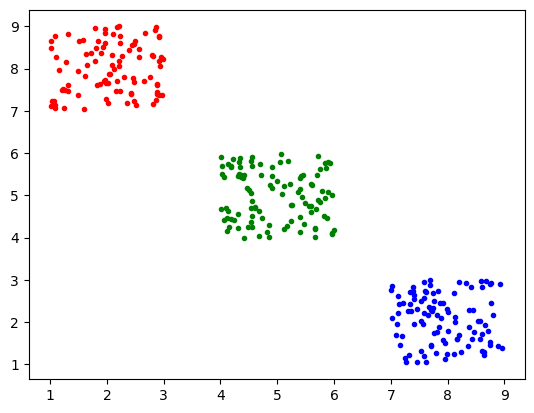

In [57]:
plt.plot(ans_0[:,0],ans_0[:,1],'.r')
plt.plot(ans_1[:,0],ans_1[:,1],'.g')
plt.plot(ans_2[:,0],ans_2[:,1],'.b')

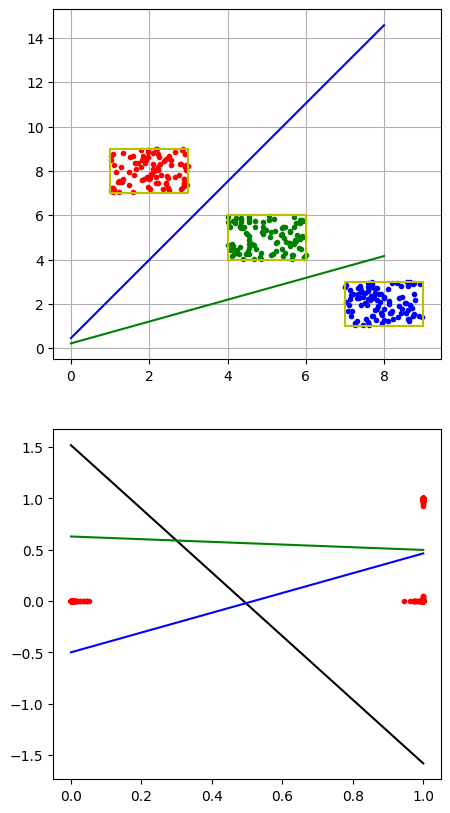

In [58]:
fig, ax = plt.subplots(2,figsize=(5,10))
ax[0].plot([0,8], [-w_1[0,0]/w_1[0,2], (-w_1[0,0]-8*w_1[0,1])/w_1[0,2]], '-b')
ax[0].plot([0,8], [-w_1[1,0]/w_1[1,2], (-w_1[1,0]-8*w_1[1,1])/w_1[1,2]], '-g')
ax[0].grid(True)

ax[0].plot(ans_0[:,0],ans_0[:,1],'.r')
ax[0].plot(ans_1[:,0],ans_1[:,1],'.g')
ax[0].plot(ans_2[:,0],ans_2[:,1],'.b')

ax[0].plot(g1,s1,'-y')
ax[0].plot(g2,s2,'-y')
ax[0].plot(g3,s3,'-y')

ax[1].plot([0,1], [-w_2[0,0]/w_2[0,2], (-w_2[0,0]-w_2[0,1])/w_2[0,2]], '-k')
ax[1].plot([0,1], [-w_2[1,0]/w_2[1,2], (-w_2[1,0]-w_2[1,1])/w_2[1,2]], '-b')
ax[1].plot([0,1], [-w_2[2,0]/w_2[2,2], (-w_2[2,0]-w_2[2,1])/w_2[2,2]], '-g')
ax[1].plot(rx, ry,'.r')

# # Set axis limits
# ax.set_xlim(0, 6)
# ax.set_ylim(0, 6)

# Show the plot
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [34]:
np.argmax(d_arr,axis=1)

array([2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1], d

In [33]:
np.argmax(z_arr,axis=1)

array([2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 1], d

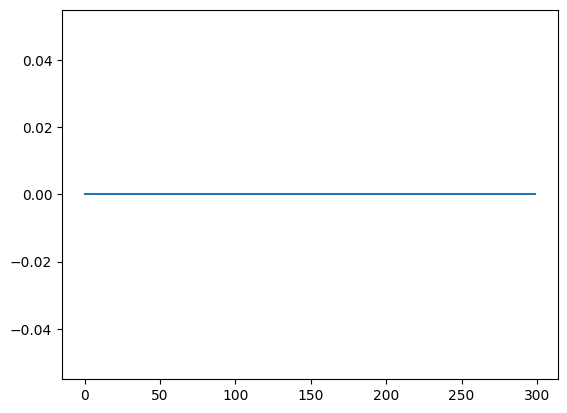

In [35]:
plt.plot(np.argmax(d_arr,axis=1) - np.argmax(z_arr,axis=1))